In [1]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../train.csv')
df_raw = df.copy()
df_raw.head()

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
## value가 문자 값이지만 등급을 나타내는 feature들 (nan값은 대상이 없음을 의미한다.)
tonum = {"ExterQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "ExterCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "HeatingQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "KitchenQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "FireplaceQu": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "PoolQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtFinType1" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
         "BsmtFinType2" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
           }
df_raw = df_raw.replace(tonum)

In [3]:
## 그 외 nan값이 모르는 값이 아닌 대상이 없음을 의미 하는 feature들
fill_na_ls = [['GarageType',# NA : 차고 없음 (category)
 'MiscFeature',             # NA : 없음  (category) 기타 범주(엘레베이터, 테이스 코트) 기타 범주
 'Fence',                   # NA : 울타리 없음 (category)
 'GarageFinish',            # NA : 차고 없음 (category)
 'BsmtExposure',            # NA : 지하실 없음
 'Alley',                   # NA : No alley access
]]

for name in fill_na_ls:
    df_raw[name] = df_raw[name].fillna('N')

In [4]:
df_raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,N,Reg,Lvl,AllPub,...,0,0,MnPrv,N,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,N,Reg,Lvl,AllPub,...,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,N,Reg,Lvl,AllPub,...,0,0,N,N,0,6,2008,WD,Normal,147500


In [5]:
# 그래도 남은 Null값들
total = df_raw.isnull().sum().sort_values(ascending=False)
percent = (df_raw.isnull().sum()/df_raw.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
pd.set_option("display.max_rows",None)
missing_data.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [6]:
# Null 값 drop
pd.set_option("display.max_columns",None)
df_raw = df_raw.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_raw = df_raw.drop(df_raw.loc[df_raw['Electrical'].isnull()].index)

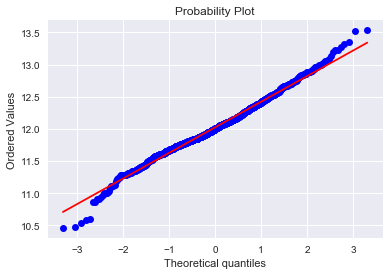

In [7]:
# y값에 로그
from scipy import stats
df_raw['SalePrice'] = np.log(df_raw['SalePrice'])
fig = plt.figure()
res = stats.probplot(df_raw['SalePrice'], plot=plt)

In [8]:
heat= df_raw.corr()
heat["SalePrice"][:].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817368
GrLivArea        0.700941
GarageCars       0.680645
ExterQual        0.678956
KitchenQual      0.668011
GarageArea       0.650916
BsmtQual         0.615871
TotalBsmtSF      0.612642
1stFlrSF         0.597218
FullBath         0.594891
YearBuilt        0.586827
YearRemodAdd     0.565822
FireplaceQu      0.546561
TotRmsAbvGrd     0.534436
Fireplaces       0.489609
HeatingQC        0.473767
BsmtFinSF1       0.372152
GarageQual       0.363265
GarageCond       0.356773
BsmtFinType1     0.334980
WoodDeckSF       0.334135
OpenPorchSF      0.321113
2ndFlrSF         0.319344
HalfBath         0.314135
BsmtCond         0.274543
LotArea          0.257321
BsmtFullBath     0.236285
BsmtUnfSF        0.222001
BedroomAbvGr     0.209044
ScreenPorch      0.121213
PoolQC           0.077292
PoolArea         0.069798
MoSold           0.057338
3SsnPorch        0.054901
ExterCond        0.049317
BsmtFinType2     0.014037
BsmtFinSF2       0.004835
BsmtHalfBath

In [9]:
#숫자 feature의 수 = 47개
len(heat)
number_feature = list(heat.index)

In [10]:
df_raw['n1stFlrSF']=df_raw['1stFlrSF']
df_raw = df_raw.drop(['1stFlrSF'], axis=1)

In [11]:
# 상관계수가 높은 상수 12개 feature의 OLS
model_num = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(GrLivArea) + scale(GarageCars) + scale(ExterQual) + scale(GarageArea) + scale(BsmtQual) + scale(TotalBsmtSF) + scale(n1stFlrSF) + scale(FullBath) + scale(YearBuilt) + scale(YearRemodAdd) + scale(FireplaceQu)", data=df_raw)
result_num = model_num.fit()
print(result_num.summary())



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     594.4
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:44:36   Log-Likelihood:                 567.54
No. Observations:                1459   AIC:                            -1109.
Df Residuals:                    1446   BIC:                            -1040.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.0240    

In [12]:
sm.stats.anova_lm(result_num, typ=2) 

,sum_sq,df,F,PR(>F)
scale(OverallQual),4.527513,1.0,166.848210,3.337590e-36
scale(GrLivArea),6.195393,1.0,228.313019,5.252057e-48
scale(GarageCars),0.488734,1.0,18.010850,2.336271e-05
scale(ExterQual),0.067917,1.0,2.502884,1.138567e-01
scale(GarageArea),0.124311,1.0,4.581105,3.249324e-02
scale(BsmtQual),0.409573,1.0,15.093605,1.069324e-04
scale(TotalBsmtSF),0.130438,1.0,4.806924,2.850449e-02
scale(n1stFlrSF),0.249092,1.0,9.179541,2.490765e-03
scale(FullBath),0.012866,1.0,0.474138,4.912000e-01
scale(YearBuilt),1.258046,1.0,46.361589,1.437042e-11


In [13]:
# ExterQual,FullBath,TotalBsmtSF를 뺀 feature의 OLS
model_num = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(GrLivArea) + scale(GarageCars) + scale(GarageArea) + scale(BsmtQual) + scale(n1stFlrSF) + scale(YearBuilt) + scale(YearRemodAdd) + scale(FireplaceQu)", data=df_raw)
result_num = model_num.fit()
print(result_num.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     788.7
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:44:49   Log-Likelihood:                 563.32
No. Observations:                1459   AIC:                            -1107.
Df Residuals:                    1449   BIC:                            -1054.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.0240    

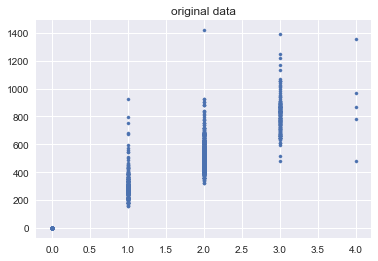

In [20]:
#PCA 판단
plt.scatter(df_raw['GarageCars'], df_raw['GarageArea'], s=10)
plt.title("original data")
plt.show()

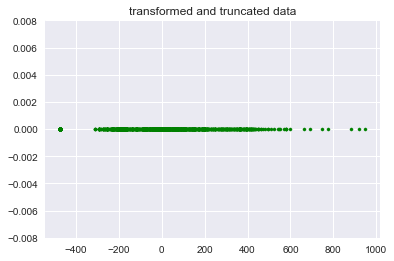

In [21]:
# PCA
X = pd.DataFrame()
X[0] = df_raw['GarageCars']
X[1] = df_raw['GarageArea']
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
Z = pca.transform(X)
w, V = np.linalg.eig(pca.get_covariance())
V.T.dot(X.T).T
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=10)
plt.title("transformed and truncated data")
plt.show()
df_raw['Garage'] = Z[:,0]

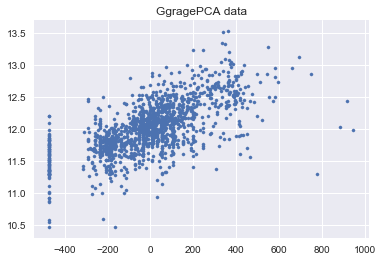

In [22]:
#PCA 후
plt.scatter(df_raw['Garage'], df_raw['SalePrice'], s=10)
plt.title("GgragePCA data")
plt.show()

In [23]:
# PCA한 Garage 추가한 OLS
model_num = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(GrLivArea) + scale(Garage) + scale(BsmtQual) + scale(n1stFlrSF) + scale(YearBuilt) + scale(YearRemodAdd) + scale(FireplaceQu)", data=df_raw)
result_num = model_num.fit()
print(result_num.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     876.4
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:46:57   Log-Likelihood:                 555.44
No. Observations:                1459   AIC:                            -1093.
Df Residuals:                    1450   BIC:                            -1045.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.0240    

In [24]:
# PCA한 Garage OLS
model_num = sm.OLS.from_formula("SalePrice ~ scale(Garage)", data=df_raw)
result_num = model_num.fit()
print(result_num.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1071.
Date:                Tue, 13 Mar 2018   Prob (F-statistic):          1.39e-176
Time:                        19:47:09   Log-Likelihood:                -329.32
No. Observations:                1459   AIC:                             662.6
Df Residuals:                    1457   BIC:                             673.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.0240      0.008   1513.524

In [25]:
# 원래 GarageArea과 GarageCars OLS
model_num = sm.OLS.from_formula("SalePrice ~ scale(GarageArea) +scale(GarageCars)", data=df_raw)
result_num = model_num.fit()
print(result_num.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     657.8
Date:                Tue, 13 Mar 2018   Prob (F-statistic):          2.99e-204
Time:                        19:48:14   Log-Likelihood:                -261.77
No. Observations:                1459   AIC:                             529.5
Df Residuals:                    1456   BIC:                             545.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.0240      0.00

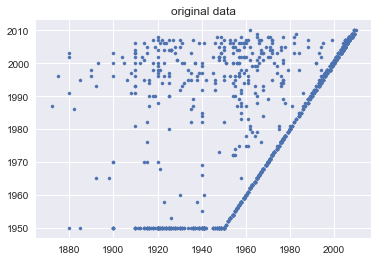

In [26]:
#PCA 판단
plt.scatter(df_raw['YearBuilt'], df_raw['YearRemodAdd'], s=10)
plt.title("original data")
plt.show()

In [27]:
# 지어진 년도와 리모델링 년도 리모델링이 없으면 두 변수가 같다. PCA는 의미 없을 듯 하므로 YearRemodAdd만 쓰는게 좋을 것같다.

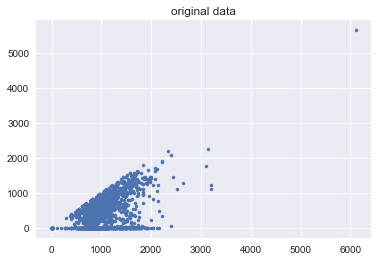

In [28]:
#PCA 판단
plt.scatter(df_raw['TotalBsmtSF'], df_raw['BsmtFinSF1'], s=10)
plt.title("original data")
plt.show()

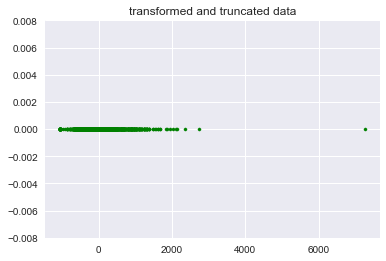

In [29]:
# PCA
X = pd.DataFrame()
X[0] = df_raw['TotalBsmtSF']
X[1] = df_raw['BsmtFinSF1']
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
Z = pca.transform(X)
w, V = np.linalg.eig(pca.get_covariance())
V.T.dot(X.T).T
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=10)
plt.title("transformed and truncated data")
plt.show()
df_raw['TotalBsmt'] = Z[:,0]

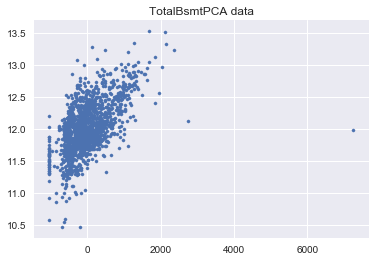

In [30]:
#PCA 후
plt.scatter(df_raw['TotalBsmt'], df_raw['SalePrice'], s=10)
plt.title("TotalBsmtPCA data")
plt.show()

In [31]:
# PCA한 Garage 추가한 OLS
model_num = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(GrLivArea) + scale(GarageArea) + scale(TotalBsmt) + scale(n1stFlrSF) + scale(YearRemodAdd) + scale(FireplaceQu)", data=df_raw)
result_num = model_num.fit()
print(result_num.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     964.8
Date:                Tue, 13 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:49:26   Log-Likelihood:                 532.44
No. Observations:                1459   AIC:                            -1049.
Df Residuals:                    1451   BIC:                            -1007.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.0240    

In [46]:
# PCA한 Garage 추가한 OLS
model_num = sm.OLS.from_formula("SalePrice ~ scale(TotalBsmt)", data=df_raw)
result_num = model_num.fit()
print(result_num.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     676.5
Date:                Tue, 13 Mar 2018   Prob (F-statistic):          1.03e-122
Time:                        19:40:51   Log-Likelihood:                -18162.
No. Observations:                1452   AIC:                         3.633e+04
Df Residuals:                    1450   BIC:                         3.634e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.806e+05   1718.765  

In [32]:
# TotalBsmtSF BsmtFinSF1 OLS
# PCA한 Garage 추가한 OLS
model_num = sm.OLS.from_formula("SalePrice ~ scale(TotalBsmtSF) + scale(BsmtFinSF1)", data=df_raw)
result_num = model_num.fit()
print(result_num.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     444.5
Date:                Tue, 13 Mar 2018   Prob (F-statistic):          2.09e-151
Time:                        19:50:42   Log-Likelihood:                -383.69
No. Observations:                1459   AIC:                             773.4
Df Residuals:                    1456   BIC:                             789.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.0240      0